[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



- a) Country Names
- b) Age
- c) Family members
- d) Weight

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [2]:
import pandas as pd
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat", index=False)

In [3]:
carbon_west

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2
5,Bulgaria,5.9
6,Canada,15.1
7,Croatia,4.0
8,Cyprus,5.3
9,Czech,9.2


Part a. Construct a histogram of CO2 emissions. 

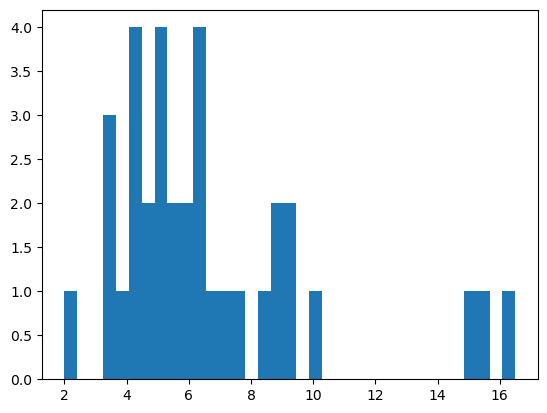

In [7]:
import matplotlib.pyplot as plt
plt.hist(carbon_west['CO2'], bins=len(carbon_west['Nation']), label=carbon_west['Nation'])
plt.show()

Part b. Find the mean, median, and standard deviation. 

In [9]:
co2 = carbon_west['CO2']

In [10]:
mean = co2.mean()
median = co2.median()
stdev = co2.std()
mean, median, stdev

(6.717142857142858, 5.9, 3.3569493954627134)

**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC). 

In [91]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

In [92]:
murders.head()

,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6


Part a. Find the mean and standard deviation for murders without D.C.

In [93]:
murders_no_dc = pd.DataFrame(murders.to_numpy()[:-1], columns=murders.columns)

In [94]:
murders_no_dc.tail()

,state,murder
45,VT,2.2
46,WA,3.1
47,WI,3.2
48,WV,4.7
49,WY,2.6


In [95]:
print(f'Mean: {murders_no_dc["murder"].mean()} Standard Deviation: {murders_no_dc["murder"].std()}')

Mean: 4.8740000000000006 Standard Deviation: 2.586291174793806


Part b. Find the five-number  summary without D.C. 

In [96]:
print(f'Min: {murders_no_dc["murder"].min()} Q1: {murders_no_dc["murder"].quantile(0.25)} Median: {murders_no_dc["murder"].median()} Q3: {murders_no_dc["murder"].quantile(0.75)} Max:{murders_no_dc["murder"].max()}')

Min: 1.0 Q1: 2.625 Median: 4.85 Q3: 6.175 Max:12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [97]:
print(f'Mean: {murders["murder"].mean()} Standard Deviation: {murders["murder"].std()}')
print(f"Min: {murders['murder'].min()} Q1: {murders['murder'].quantile(0.25)} Median: {murders['murder'].median()} Q3: {murders['murder'].quantile(0.75)} Max:{murders['murder'].max()}")

Mean: 5.252941176470588 Standard Deviation: 3.7253914125190377
Min: 1.0 Q1: 2.6500000000000004 Median: 5.0 Q3: 6.45 Max:24.2


- The Mean was affected a lot more than the Median with there being a 0.4 difference between means and 0.15 difference between medians
- The Range was greatly affected with a difference of 11.8 compared to >1 difference for IQR

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [98]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

In [99]:
houses

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3
...,...,...,...,...,...,...,...
95,96,264.00,1060,0,990,2,2
96,97,294.75,1730,0,3030,3,2
97,98,198.30,1370,0,1580,3,2
98,99,132.60,1560,0,1770,3,2


Part a. Construct a scatterplot between square feet and price of a home. 

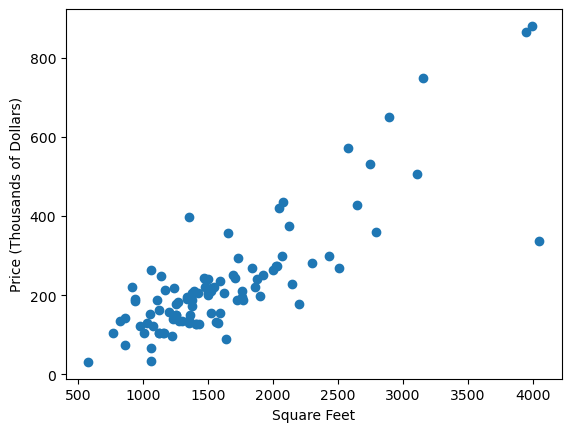

In [70]:
plt.scatter(y=houses['price'], x=houses['size'])
plt.ylabel('Price (Thousands of Dollars)')
plt.xlabel('Square Feet')
plt.show()

Part b. Find the correlation between the two variables.

In [108]:
from scipy.stats import pearsonr

In [109]:
corr, _ = pearsonr(houses['price'], houses['size'])

In [117]:
corr

0.8337847885586537

Part c. Find and plot the regression line on top of the scatterplot. 

In [110]:
import numpy as np

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


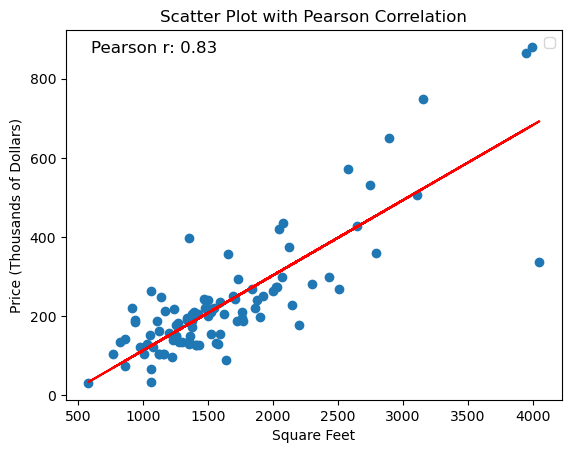

In [158]:
plt.scatter(y=houses['price'], x=houses['size'])
plt.ylabel('Price (Thousands of Dollars)')
plt.xlabel('Square Feet')

# Line of best fit
m, b = np.polyfit(houses['size'], houses['price'], 1)
plt.plot(houses['size'], m*houses['size'] + b, color='red')

# Annotate the plot with Pearson's correlation coefficient
plt.text(0.05, 0.95, f'Pearson r: {corr:.2f}', ha='left', va='center', transform=plt.gca().transAxes, fontsize=12, color='black')

# Adding labels and title
plt.xlabel('Square Feet')
plt.ylabel('Price (Thousands of Dollars)')
plt.title('Scatter Plot with Pearson Correlation')
plt.legend()

# Show plot
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new. 

In [136]:
old_houses = houses.query('new == 0')
new_houses = houses.query('new == 1')

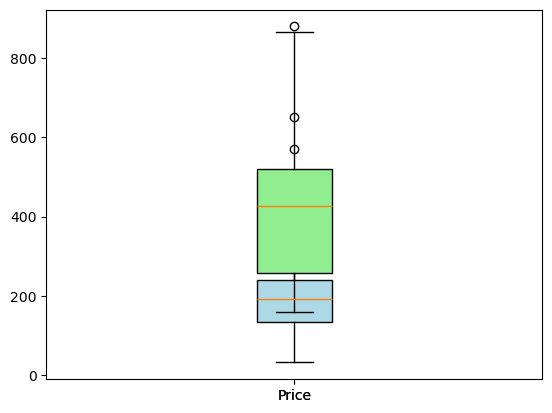

In [157]:
fig, ax = plt.subplots()
ax.boxplot(old_houses['price'], labels=['Price'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax.boxplot(new_houses['price'], labels=['Price'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

- As the size of the house increases, the price generally increases as well. We can see this because of the high correlation value, along with the line of best fit following the data points for the smaller homes.
- Here, we can see that the IQR of the old is completely separate from the new houses and the old house prices are lower than the new house price. So, with the data given, we can see that older houses cost less than newer houses

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness. 

In [176]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [177]:
happy

,subject happiness marital gender
0,1 1 1 male
1,2 1 1 male
2,3 1 1 male
3,4 1 1 male
4,5 1 1 male
...,...
2137,2138 3 3 female
2138,2139 3 3 female
2139,2140 3 3 female
2140,2141 3 3 female


In [178]:
happiness = []
marital = []
for values in happy.values:
    for test in values:
        pass
    sub, hap, mar, gen = test.split()
    happiness.append(int(hap))
    marital.append(int(mar))

1 1 1 male
2 1 1 male
3 1 1 male
4 1 1 male
5 1 1 male
6 1 1 male
7 1 1 male
8 1 1 male
9 1 1 male
10 1 1 male
11 1 1 male
12 1 1 male
13 1 1 male
14 1 1 male
15 1 1 male
16 1 1 male
17 1 1 male
18 1 1 male
19 1 1 male
20 1 1 male
21 1 1 male
22 1 1 male
23 1 1 male
24 1 1 male
25 1 1 male
26 1 1 male
27 1 1 male
28 1 1 male
29 1 1 male
30 1 1 male
31 1 1 male
32 1 1 male
33 1 1 male
34 1 1 male
35 1 1 male
36 1 1 male
37 1 1 male
38 1 1 male
39 1 1 male
40 1 1 male
41 1 1 male
42 1 1 male
43 1 1 male
44 1 1 male
45 1 1 male
46 1 1 male
47 1 1 male
48 1 1 male
49 1 1 male
50 1 1 male
51 1 1 male
52 1 1 male
53 1 1 male
54 1 1 male
55 1 1 male
56 1 1 male
57 1 1 male
58 1 1 male
59 1 1 male
60 1 1 male
61 1 1 male
62 1 1 male
63 1 1 male
64 1 1 male
65 1 1 male
66 1 1 male
67 1 1 male
68 1 1 male
69 1 1 male
70 1 1 male
71 1 1 male
72 1 1 male
73 1 1 male
74 1 1 male
75 1 1 male
76 1 1 male
77 1 1 male
78 1 1 male
79 1 1 male
80 1 1 male
81 1 1 male
82 1 1 male
83 1 1 male
84 1 1 male
8

In [181]:
happy['happiness'] = happiness
happy['marital'] = marital

In [182]:
contingency_table = pd.crosstab(happy['marital'], happy['happiness'])

In [183]:
print(contingency_table)

happiness    1    2    3
marital                 
1          432  504   61
2           92  282  103
3          124  409  135
